# Machine Learning Classification Model for prediction of Adverts Clicked 

## The folllowing is the model for the dataset on clicked adverts and the prediction by using CatBoostClassifier. The train.csv dataset contains 1000 entries and the test.csv dataset contains 300 entries to which the prediction is outputed into the Clicked_result.csv. You can follow through to see the operations performed on the data and the model built for the prediction.

## The first cell contains all the neccesary libraries that will be used in the model and all the preprocessing activities.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from catboost import CatBoostClassifier

## Getting the datasets


In [2]:
train = pd.read_csv(r'C:\Users\Admin\Downloads\Data Science projects\Clicked Machine Learning Classification Model\train.csv')
test = pd.read_csv(r'C:\Users\Admin\Downloads\Data Science projects\Clicked Machine Learning Classification Model\test.csv')
sub = pd.read_csv(r'C:\Users\Admin\Downloads\Data Science projects\Clicked Machine Learning Classification Model\test_solution.csv')

## Viewing the the train.csv dataset

In [3]:
train

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Clicked
0,1200,01-01-16 3:35,68.01,25,14775.50,188.32,Adaptive 24hour Graphic Interface,1,Afghanistan,0
1,1201,27-02-16 15:04,45.99,33,57009.76,124.61,Adaptive 24hour Graphic Interface,1,Afghanistan,1
2,1202,01-03-16 10:01,77.07,40,57877.15,261.02,Adaptive asynchronous attitude,0,Afghanistan,0
3,1203,10-03-16 22:28,51.87,50,60575.99,119.65,Adaptive context-sensitive application,0,Afghanistan,1
4,1204,12-03-16 1:39,66.83,32,61004.51,201.26,Adaptive contextually-based methodology,1,Afghanistan,1
...,...,...,...,...,...,...,...,...,...,...
995,2195,24-02-16 0:44,83.98,36,55764.43,194.62,Vision-oriented real-time framework,0,Zimbabwe,0
996,2196,24-02-16 7:13,36.91,48,56067.38,159.69,Vision-oriented system-worthy forecast,0,Zimbabwe,1
997,2197,27-02-16 8:52,56.64,29,56770.79,123.24,Vision-oriented system-worthy forecast,1,Zimbabwe,1
998,2198,28-04-16 21:58,67.35,29,76368.31,118.69,Vision-oriented uniform knowledgebase,0,Zimbabwe,1



## Viewing the the test.csv dataset 


In [4]:
test

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country
0,2200,04-06-16 17:24,43.88,54,31523.09,166.85,Enhanced methodical database,1,Somalia
1,2201,05-06-16 0:29,66.40,40,77567.85,214.42,Digitized heuristic solution,0,Antigua and Barbuda
2,2202,05-06-16 0:29,79.52,34,NaN,141.58,Customer-focused 24/7 concept,0,United States of America
3,2203,05-06-16 7:54,52.35,25,33293.78,147.61,Mandatory 4thgeneration structure,1,Mali
4,2204,05-06-16 7:54,81.51,36,NaN,195.93,Monitored local Internet solution,0,Croatia
...,...,...,...,...,...,...,...,...,...
295,2495,23-07-16 6:18,74.06,23,40345.49,225.99,Phased content-based middleware,0,Wallis and Futuna
296,2496,23-07-16 11:46,61.88,42,60223.52,112.19,Balanced actuating moderator,1,Martinique
297,2497,23-07-16 14:47,80.03,44,24030.06,150.84,Automated static concept,0,Afghanistan
298,2498,24-07-16 0:22,86.38,33,NaN,233.60,Organic well-modulated database,0,United States of America


## Visualizing the distribution of Clicked values in the train.csv dataset

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


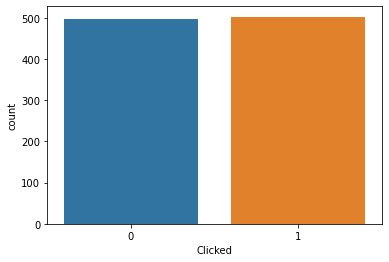

In [5]:
sns.countplot(train['Clicked']);

## Finding out how many unique values are in each column in the train.csv dataset.

In [6]:
train.nunique().sort_values()

gender                         2
Clicked                        2
Age                           43
Country                      233
Daily Time Spent on Site     751
Timestamp                    772
Area Income                  775
Daily Internet Usage         797
Ad Topic Line                825
id                          1000
dtype: int64

## Finding out the data types of the columns in the train.csv dataset for identification of Categorical data. The categorical data is identified by the datatype "object".

In [7]:
train.dtypes

id                            int64
Timestamp                    object
Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
gender                        int64
Country                      object
Clicked                       int64
dtype: object

## Finding the null values in the train.csv dataset

In [8]:
train.isnull().sum()

id                            0
Timestamp                     0
Daily Time Spent on Site      0
Age                           0
Area Income                 225
Daily Internet Usage          0
Ad Topic Line                 0
gender                        0
Country                       0
Clicked                       0
dtype: int64

## finding the null values in the test.csv dataset

In [9]:
test.isnull().sum()

id                           0
Timestamp                    0
Daily Time Spent on Site     0
Age                          0
Area Income                 75
Daily Internet Usage         0
Ad Topic Line                0
gender                       0
Country                      0
dtype: int64

## Inputting missing values for both train.csv and test.csv datasets

In [10]:
train.fillna(-999, inplace=True)
test.fillna(-999,inplace=True)

## Checking if the missing values are filled in in train.csv

In [11]:
train.isnull().sum()

id                          0
Timestamp                   0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
gender                      0
Country                     0
Clicked                     0
dtype: int64

## Checking if the missing values are filled in in train.csv

In [12]:
test.isnull().sum()

id                          0
Timestamp                   0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
gender                      0
Country                     0
dtype: int64

## First,we separate the train.csv dataset by getting a separate collection of the intended output for training the model. Dividing the train dataset to train the model. I also dropped some irrelevant data like 'Clicked' which is being generated and 'id' which is equivalent to a name, that doesn't repeat in the entire dataset, so it would not help in the model. I had added Timestamp to this list but I decided to use it . In the repository you can still find the prediction result that I got without using Timestamp, clicked_results.csv.

In [13]:
X = train.drop(['Clicked',"id"], axis=1)
Y = train.Clicked

## Dividing the train.csv dataset to train the model. You create a training dataset and a testing dataset from the train.csv dataset. The 0.20 signifies the division. So 80% for training and 20% for testing.

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=1234)

## Here, we are verifying the datatypes to ensure you get all the categorical data types. No preprocessing activities will be done on the categorical data, CatBoostClassifier will handle all of that to change the categorical data to numerical data to be used by the classification algorithm. 
## Categorical data in simple terms refers to data that refers to specific categories signified by words thus they can be converted to numeric data. words like "yes","no" and "maybe" are converted to 1, 2 and 3 instead. Machine Learning algorithms use mathematical calculations to calculate the predicitions behind the scenes so they need numbers to work, herego the "yes", "no" and "maybe" data is changed to numbers to be able to be used in the mathematical equation.

In [15]:
X.dtypes

Timestamp                    object
Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
gender                        int64
Country                      object
dtype: object

## This is the part where you identify all the categorical columns for CatBoost to do its thing.

In [16]:
cat_features = ["Timestamp","Ad Topic Line", "Country"]

## This is the part where the model is finally actualized in full. you need to tweek the values insided the model to make changes to the accuracy and other factors of the model.

In [17]:
model_cb = CatBoostClassifier(task_type = 'CPU', iterations = 1000, random_state = 2021, eval_metric='Accuracy', learning_rate = 0.3)

## This is the part where you fit the data you have been preparing to the model for training.

In [18]:
model_cb.fit(X_train, Y_train, cat_features = cat_features, plot = True, eval_set = (X_test, Y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8475000	test: 0.8800000	best: 0.8800000 (0)	total: 179ms	remaining: 2m 59s
1:	learn: 0.8462500	test: 0.8850000	best: 0.8850000 (1)	total: 197ms	remaining: 1m 38s
2:	learn: 0.8525000	test: 0.8950000	best: 0.8950000 (2)	total: 223ms	remaining: 1m 14s
3:	learn: 0.8625000	test: 0.8800000	best: 0.8950000 (2)	total: 255ms	remaining: 1m 3s
4:	learn: 0.8625000	test: 0.8700000	best: 0.8950000 (2)	total: 283ms	remaining: 56.2s
5:	learn: 0.8725000	test: 0.8900000	best: 0.8950000 (2)	total: 306ms	remaining: 50.7s
6:	learn: 0.8750000	test: 0.8850000	best: 0.8950000 (2)	total: 331ms	remaining: 47s
7:	learn: 0.8725000	test: 0.8750000	best: 0.8950000 (2)	total: 354ms	remaining: 43.9s
8:	learn: 0.8737500	test: 0.8700000	best: 0.8950000 (2)	total: 367ms	remaining: 40.5s
9:	learn: 0.8887500	test: 0.8750000	best: 0.8950000 (2)	total: 394ms	remaining: 39s
10:	learn: 0.8912500	test: 0.8900000	best: 0.8950000 (2)	total: 416ms	remaining: 37.4s
11:	learn: 0.8925000	test: 0.8850000	best: 0.8950000 (

97:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 2.77s	remaining: 25.5s
98:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 2.8s	remaining: 25.5s
99:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 2.82s	remaining: 25.4s
100:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 2.84s	remaining: 25.3s
101:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 2.87s	remaining: 25.2s
102:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 2.89s	remaining: 25.2s
103:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 2.92s	remaining: 25.1s
104:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 2.95s	remaining: 25.2s
105:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 2.98s	remaining: 25.1s
106:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 3s	remaining: 25.1s
107:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 3.02s	remaining: 25s
108:	learn: 1.0000000	test: 0.8600000	bes

197:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 5.27s	remaining: 21.4s
198:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 5.29s	remaining: 21.3s
199:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 5.32s	remaining: 21.3s
200:	learn: 1.0000000	test: 0.8600000	best: 0.8950000 (2)	total: 5.34s	remaining: 21.2s
201:	learn: 1.0000000	test: 0.8600000	best: 0.8950000 (2)	total: 5.37s	remaining: 21.2s
202:	learn: 1.0000000	test: 0.8600000	best: 0.8950000 (2)	total: 5.41s	remaining: 21.2s
203:	learn: 1.0000000	test: 0.8600000	best: 0.8950000 (2)	total: 5.43s	remaining: 21.2s
204:	learn: 1.0000000	test: 0.8600000	best: 0.8950000 (2)	total: 5.45s	remaining: 21.1s
205:	learn: 1.0000000	test: 0.8600000	best: 0.8950000 (2)	total: 5.47s	remaining: 21.1s
206:	learn: 1.0000000	test: 0.8600000	best: 0.8950000 (2)	total: 5.5s	remaining: 21.1s
207:	learn: 1.0000000	test: 0.8600000	best: 0.8950000 (2)	total: 5.52s	remaining: 21s
208:	learn: 1.0000000	test: 0.86000

299:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.74s	remaining: 18.1s
300:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.76s	remaining: 18s
301:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.79s	remaining: 18s
302:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.81s	remaining: 18s
303:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.83s	remaining: 17.9s
304:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.86s	remaining: 17.9s
305:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.88s	remaining: 17.9s
306:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.9s	remaining: 17.8s
307:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.94s	remaining: 17.8s
308:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.96s	remaining: 17.8s
309:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.99s	remaining: 17.8s
310:	learn: 1.0000000	test: 0.8650000	b

393:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 10s	remaining: 15.4s
394:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 10s	remaining: 15.4s
395:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 10.1s	remaining: 15.4s
396:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 10.1s	remaining: 15.3s
397:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 10.1s	remaining: 15.3s
398:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 10.1s	remaining: 15.3s
399:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 10.2s	remaining: 15.2s
400:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 10.2s	remaining: 15.2s
401:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 10.2s	remaining: 15.2s
402:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 10.2s	remaining: 15.1s
403:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 10.3s	remaining: 15.1s
404:	learn: 1.0000000	test: 0.875000

492:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 12.7s	remaining: 13s
493:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 12.7s	remaining: 13s
494:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 12.7s	remaining: 13s
495:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 12.7s	remaining: 12.9s
496:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 12.8s	remaining: 12.9s
497:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 12.8s	remaining: 12.9s
498:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 12.8s	remaining: 12.9s
499:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 12.8s	remaining: 12.8s
500:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 12.9s	remaining: 12.8s
501:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 12.9s	remaining: 12.8s
502:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 12.9s	remaining: 12.8s
503:	learn: 1.0000000	test: 0.8750000	

587:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.2s	remaining: 10.6s
588:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.2s	remaining: 10.6s
589:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.2s	remaining: 10.6s
590:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.3s	remaining: 10.6s
591:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.3s	remaining: 10.5s
592:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.3s	remaining: 10.5s
593:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.3s	remaining: 10.5s
594:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.4s	remaining: 10.5s
595:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.4s	remaining: 10.4s
596:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.4s	remaining: 10.4s
597:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.4s	remaining: 10.4s
598:	learn: 1.0000000	test: 0.87

681:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18.1s	remaining: 8.46s
682:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18.2s	remaining: 8.43s
683:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18.2s	remaining: 8.4s
684:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18.2s	remaining: 8.37s
685:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18.2s	remaining: 8.34s
686:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18.3s	remaining: 8.33s
687:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18.3s	remaining: 8.31s
688:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18.3s	remaining: 8.28s
689:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18.4s	remaining: 8.25s
690:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18.4s	remaining: 8.22s
691:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18.4s	remaining: 8.2s
692:	learn: 1.0000000	test: 0.8700

783:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 21.1s	remaining: 5.82s
784:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 21.2s	remaining: 5.79s
785:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 21.2s	remaining: 5.77s
786:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 21.2s	remaining: 5.74s
787:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 21.2s	remaining: 5.71s
788:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 21.2s	remaining: 5.68s
789:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 21.3s	remaining: 5.66s
790:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 21.3s	remaining: 5.63s
791:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 21.3s	remaining: 5.6s
792:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 21.3s	remaining: 5.57s
793:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 21.4s	remaining: 5.54s
794:	learn: 1.0000000	test: 0.870

885:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 23.8s	remaining: 3.06s
886:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 23.8s	remaining: 3.04s
887:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 23.9s	remaining: 3.01s
888:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 23.9s	remaining: 2.98s
889:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 23.9s	remaining: 2.95s
890:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 23.9s	remaining: 2.92s
891:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 23.9s	remaining: 2.9s
892:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 24s	remaining: 2.87s
893:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 24s	remaining: 2.84s
894:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 24s	remaining: 2.82s
895:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 24s	remaining: 2.79s
896:	learn: 1.0000000	test: 0.8750000	bes

979:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 26.1s	remaining: 533ms
980:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 26.2s	remaining: 507ms
981:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 26.2s	remaining: 480ms
982:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 26.2s	remaining: 453ms
983:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 26.2s	remaining: 426ms
984:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 26.3s	remaining: 400ms
985:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 26.3s	remaining: 373ms
986:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 26.3s	remaining: 346ms
987:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 26.3s	remaining: 320ms
988:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 26.3s	remaining: 293ms
989:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 26.4s	remaining: 266ms
990:	learn: 1.0000000	test: 0.87

## This is where you test the predictive capabilities of the model that you just trained.

In [19]:
y_pred = model_cb.predict(X_test)

## This is where you use the sklearn metrics library to get the F1 score of the model.

In [20]:
metrics.f1_score(Y_test, y_pred)

0.8955223880597015

## This is where you use the sklearn metrics library to get the Accuracy score of the model.

In [21]:
metrics.accuracy_score(Y_test, y_pred)

0.895

## This is where you prepare the test.csv dataset by dropping the id and using the preprepared dataset skeleton in the repository. It is the one labeled sample.csv which is made by deleting all the columns except 'id' in the test.csv dataset and labling a new column called Clicked to contain the results. This is used to create the clicked_results.csv and clicked_results2.csv since it has to match the id numbers in the test.csv dataset and has to be the same number of rows as the output.

In [22]:
test2 = test.drop(["id"], axis=1)

## Here we predict the results using the dataframe of the test.csv dataset. After that you create the prediction results (clicked_results.csv and clicked_results2.csv) using the test_solution.csv file.
## A Dataframe is just what you get when you read in a dataset like train.csv into the Jupyter notebook like we did in the second code-cell in this notebook.

In [23]:
result = model_cb.predict(test2)
sub['Clicked'] = result
sub.to_csv('clicked_results2.csv', index = 0)

## Visualizing the distribution of Clicked values in the clicked_results.csv dataset

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


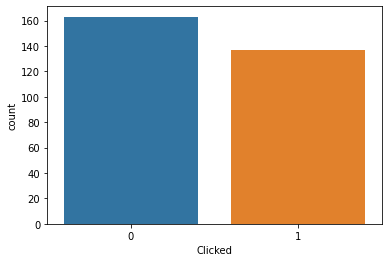

In [24]:
clicked_results = pd.read_csv(r'C:\Users\Admin\Downloads\Data Science projects\Clicked Machine Learning Classification Model\clicked_results2.csv')
sns.countplot(clicked_results['Clicked']);

## You will notice that in this Github repository that I have two results, clicked_results.csv and clicked_results2.csv, in the first one I didn't use Timestamp but in the second one I did. 